#HW 2: Supervised Learning Models--Di Wu

In [ ]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

##Classification on red and white wine characteristics

###1. Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

In [ ]:
#reading in csv data
df1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
winetype = 1
df1['winetype'] = winetype
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
#reading in csv data
df2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
winetype = 0
df2['winetype'] = winetype
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [ ]:
#reading in csv data
df3 = pd.concat([df1, df2])
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Text(0, 0.5, 'Count')

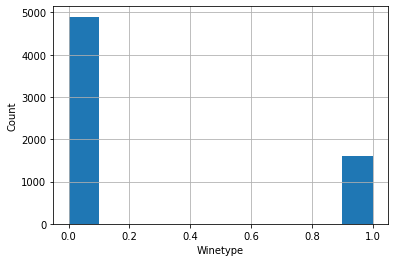

In [ ]:
#Visualize the univariate distribution of the target feature
df3['winetype'].hist()
plt.xlabel("Winetype")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

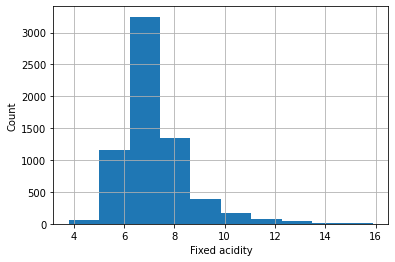

In [ ]:
#Visualize three continuous explanatory variables
df3['fixed acidity'].hist()
plt.xlabel("Fixed acidity")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

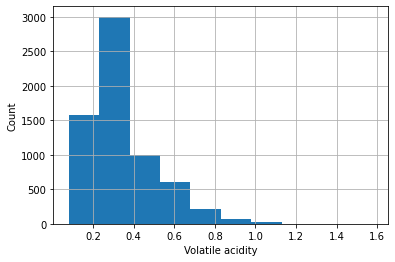

In [ ]:
#Visualize three continuous explanatory variables
df3['volatile acidity'].hist()
plt.xlabel("Volatile acidity")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

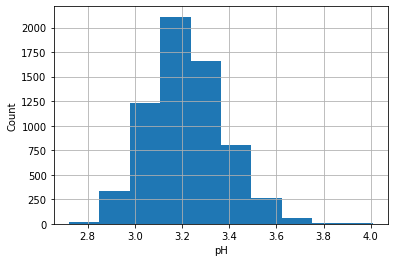

In [ ]:
#Visualize three continuous explanatory variables
df3['pH'].hist()
plt.xlabel("pH")
plt.ylabel("Count")

###2. Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [ ]:
#Split data into training and test set
y0 = df3['winetype']
X0 = df3.loc[:, df3.columns !='winetype']
X0 = X0.iloc[:, 1:]

X0.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, random_state=42)

print(X0.shape)
X0_train.shape

(6497, 11)


(4872, 11)

In [ ]:
#Before scaling the data with the StandardScaler
#Logistic regression
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(penalty='none', max_iter=100).fit(X0_train, y0_train)

print("logreg1 .coef_: {}".format(logreg1 .coef_))
print("Training set score: {:.2f}".format(logreg1.score(X0_train, y0_train)))
print("Test set score: {:.2f}".format(logreg1.score(X0_test, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none', max_iter=66666), X0_train, y0_train, scoring="r2"))))

logreg1 .coef_: [[ 9.60234151e+00 -1.83097001e+00 -1.07007598e+00  2.22738646e+01
   7.46497218e-02 -5.67419278e-02  1.59702790e+03 -6.50090404e-01
   4.10993594e+00  1.34356503e+00  4.03400927e-01]]
Training set score: 0.99
Test set score: 0.99
Cross validation score: 0.97


In [ ]:
#Penalized regression
from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(C=100, penalty='l2', max_iter=100).fit(X0_train, y0_train)

print("logreg2 .coef_: {}".format(logreg2 .coef_))
print("Training set score: {:.2f}".format(logreg2.score(X0_train, y0_train)))
print("Test set score: {:.2f}".format(logreg2.score(X0_test, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(C=100, penalty='l2', max_iter=66666), X0_train, y0_train, scoring="r2"))))

logreg2 .coef_: [[14.34756135  3.32192584 -0.14148114 27.12407148  0.05109144 -0.07557053
  19.14536176  5.62649393 10.93580493 -0.91829785  0.12343947]]
Training set score: 0.99
Test set score: 0.98
Cross validation score: 0.92


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(C=100, penalty='l1', solver='saga', max_iter=100).fit(X0_train, y0_train)

print("logreg3 .coef_: {}".format(logreg3 .coef_))
print("Training set score: {:.2f}".format(logreg3.score(X0_train, y0_train)))
print("Test set score: {:.2f}".format(logreg3.score(X0_test, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(C=100, penalty='l1',solver='saga', max_iter=66666), X0_train, y0_train, scoring="r2"))))

logreg3 .coef_: [[ 4.48748261  0.2450465  -0.12163232  0.82702488  0.03667756 -0.06591954
   0.58978615  2.89365795  3.52943976 -0.8465404  -0.16957861]]
Training set score: 0.97
Test set score: 0.96
Cross validation score: 0.82


In [ ]:
#KNN for classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X0_train, y0_train)

print("Training set score: {:.2f}".format(knn.score(X0_train, y0_train)))
print("Test set score: {:.2f}".format(knn.score(X0_test, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X0_train, y0_train, scoring="r2"))))

Training set score: 0.96
Test set score: 0.93
Cross validation score: 0.65


In [ ]:
#After scaling the data with StandardScaler
#Logistic regression
scaler = preprocessing.StandardScaler()
scaler.fit(X0_train)
X0_train_scaled = scaler.transform(X0_train)
X0_test_scaled = scaler.transform(X0_test)
logreg1 = LogisticRegression(penalty='none', max_iter=66666).fit(X0_train_scaled, y0_train)

print("Training set score: {:.2f}".format(logreg1.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(logreg1.score(X0_test_scaled, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(penalty='none', max_iter=66666).fit(X0_train_scaled, y0_train), X0_train_scaled, y0_train, scoring="r2"))))

Training set score: 0.99
Test set score: 0.99
Cross validation score: 0.97


In [ ]:
#Penalized Logistic Regression
logreg2 = LogisticRegression(C=100, penalty='l2', max_iter=66666).fit(X0_train_scaled, y0_train)

print("Training set score: {:.2f}".format(logreg2.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(logreg2.score(X0_test_scaled, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(C=100, penalty='l2', max_iter=66666), X0_train_scaled, y0_train, scoring="r2"))))

Training set score: 0.99
Test set score: 0.99
Cross validation score: 0.97


In [ ]:
#Penalized Logistic Regression (l2 penalty")
logreg3 = LogisticRegression(C=100, penalty='l1', solver='saga', max_iter=66666).fit(X0_train_scaled, y0_train)

print("Training set score: {:.2f}".format(logreg3.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(logreg3.score(X0_test_scaled, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(LogisticRegression(C=100, penalty='l1', solver='saga', max_iter=66666), X0_train_scaled, y0_train, scoring="r2"))))

Training set score: 0.99
Test set score: 0.99
Cross validation score: 0.97


In [ ]:
#KNN for classification
knn = KNeighborsClassifier().fit(X0_train_scaled, y0_train)

print("Training set score: {:.2f}".format(knn.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(knn.score(X0_test_scaled, y0_test)))
print("Cross validation score: {:.2f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X0_train_scaled, y0_train, scoring="r2"))))

Training set score: 0.99
Test set score: 0.99
Cross validation score: 0.96


StandardScaler has improved all of the accuracy of the models.

###3. Tune the parameters where possible using GridSearchCV. Do the results improve?

In [ ]:
#Penalized logistic regression
param_grid1 = {'C': np.arange(1, 15, 2), 'penalty': ['l1','l2']} 
grid = GridSearchCV(LogisticRegression(max_iter=66666), param_grid=param_grid1)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 5}
Training set score: 0.99
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
param_grid2 = {'C': np.arange(1, 15, 2), 'penalty': ['l1','l2']} 
grid = GridSearchCV(LogisticRegression(, solver='saga', max_iter=66666), param_grid=param_grid2)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 1}
Training set score: 0.99
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
#KNN for classification
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)} 
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Test set score: 1.00
Test set score: 0.99
Best mean cross-validation score: 0.99


The results have improved in all models after tuning the parameters, especially for KNN for classification model.

###4. Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?



In [ ]:
#Change from ‘stratified k-fold’ to ‘kfold’ with shuffling
#Penalized logistic regression
from sklearn.model_selection import KFold

param_grid1 = {'C': np.arange(1, 15, 2)} 
cv=KFold(shuffle=True, random_state = 1)
grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=66666), param_grid=param_grid1, cv=cv)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 7}
Training set score: 0.99
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
param_grid2 = {'C': np.arange(1, 15, 2)} 
cv=KFold(shuffle=True, random_state = 1)
grid = GridSearchCV(LogisticRegression(penalty='l1',solver='saga', max_iter=66666), param_grid=param_grid2, cv=cv)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 1}
Training set score: 0.99
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
#KNN for classification
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)} 
cv=KFold(shuffle=True, random_state = 1)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=cv)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Test set score: 1.00
Test set score: 0.99
Best mean cross-validation score: 0.99


The parameter for penalized logistic regression model with 'l2' penalty has changed from 5 to 9 after changing the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling, but the other two models' parameters haven't changed.



In [ ]:
#change the random seed of the shuffling
#Penalized logistic regression
param_grid1 = {'C': np.arange(1, 15, 2)} 
cv=KFold(shuffle=True, random_state=2)
grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=66666), param_grid=param_grid1, cv=cv)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 5}
Training set score: 0.99
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
param_grid2 = {'C': np.arange(1, 15, 2)} 
cv=KFold(shuffle=True, random_state=2)
grid = GridSearchCV(LogisticRegression(penalty='l1',solver='saga', max_iter=66666), param_grid=param_grid2, cv=cv)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 1}
Training set score: 0.99
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
#KNN for classification
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)} 
cv=KFold(shuffle=True, random_state=2)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=cv)
grid.fit(X0_train_scaled, y0_train)

print("Best parameters: {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X0_train_scaled, y0_train)))
print("Test set score: {:.2f}".format(grid.score(X0_test_scaled, y0_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Test set score: 1.00
Test set score: 0.99
Best mean cross-validation score: 0.99


Changing the random seed of the shuffling hasn't change the scores or parameters of any of the models.

In [ ]:
#Change the random state of the split into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X0, y0, random_state=20)

scaler = preprocessing.StandardScaler()
scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [ ]:
#Penalized logistic regression
param_grid1 = {'C': np.arange(1, 15, 2)} 
grid = GridSearchCV(LogisticRegression(penalty='l2', max_iter=66666), param_grid=param_grid1)
grid.fit(X1_train_scaled, y1_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X1_train_scaled, y1_train)))
print("Test set score: {:.2f}".format(grid.score(X1_test_scaled, y1_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 5}
Training set score: 1.00
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
param_grid2 = {'C': np.arange(1, 15, 2)} 
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='saga', max_iter=66666), param_grid=param_grid2)
grid.fit(X1_train_scaled, y1_train)

print("Best parameters: {}".format(grid.best_params_))
print("Training set score: {:.2f}".format(grid.score(X1_train_scaled, y1_train)))
print("Test set score: {:.2f}".format(grid.score(X1_test_scaled, y1_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 1}
Training set score: 1.00
Test set score: 0.99
Best mean cross-validation score: 0.99


In [ ]:
#KNN for classification
param_grid3 = {'n_neighbors': np.arange(1, 15, 2)} 
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3)
grid.fit(X1_train_scaled, y1_train)

print("Best parameters: {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X1_train_scaled, y1_train)))
print("Test set score: {:.2f}".format(grid.score(X1_test_scaled, y1_test)))
print("Best mean cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Test set score: 1.00
Test set score: 0.99
Best mean cross-validation score: 0.99


The results have not changed after changing the random state of the split into training and test data.

###5. Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [ ]:
#Logistic regression
logreg1 = LogisticRegression(penalty='none', max_iter=66666).fit(X0_train_scaled, y0_train)

print("logreg1.coef_: {}".format(logreg1.coef_))

logreg1.coef_: [[ 1.55656845 -0.26222883 -5.11529336  0.74616344  1.30034929 -3.17142153
   4.80825903 -0.09903954  0.60514104  1.59909646  0.35562116]]


In [ ]:
#Penalized logistic regression
logreg2 = LogisticRegression(C=5, penalty='l2', max_iter=66666).fit(X0_train_scaled, y0_train)

print("logreg2.coef_: {}".format(logreg2.coef_))

logreg2.coef_: [[ 1.52357551 -0.2374822  -4.62203706  0.73982421  1.16711261 -3.05597418
   4.44368354 -0.02915728  0.63027296  1.41205023  0.33561519]]


In [ ]:
logreg3 = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=66666).fit(X0_train_scaled, y0_train)

print("logreg3.coef_: {}".format(logreg3.coef_))

logreg3.coef_: [[ 1.49158986 -0.20369343 -4.4614975   0.70625731  1.06196719 -2.96179611
   4.31349951  0.          0.61388092  1.33619796  0.31521172]]


The coefficients indcate that all of the models agree on the important features like fixed acidity, citric acid and free sulfur dioxide. Since all of the models have very high accuracy in cross validation, I would choose penalized logistic regression model with penalty of l2 to predict new data because the coefficients of it is more obvious than other models.